# Correlation Functions

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:36: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in less


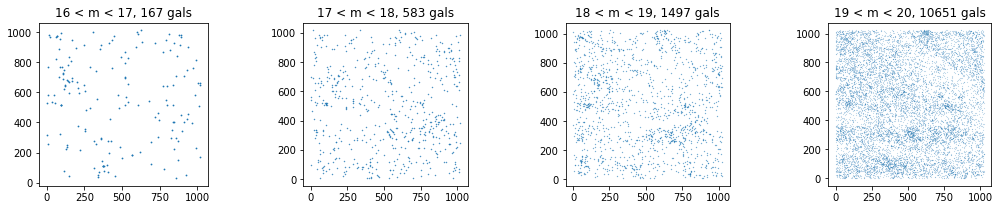

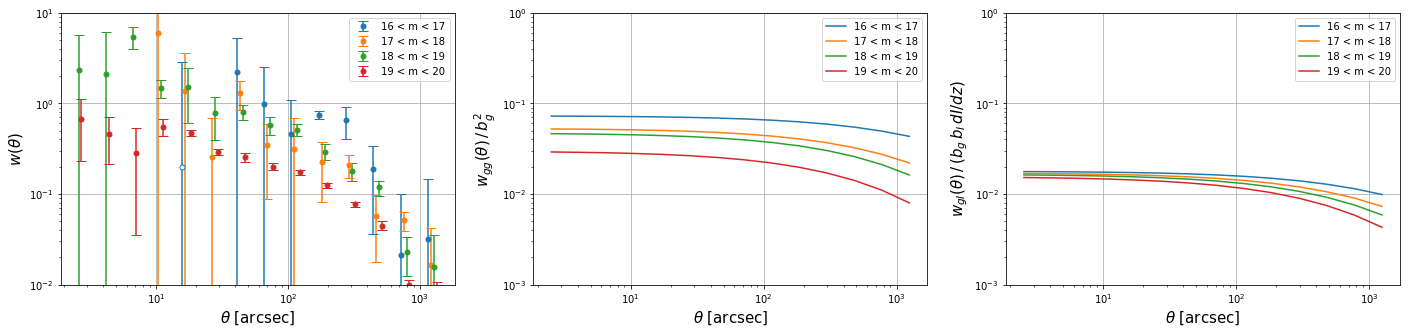

In [24]:
from astropy import units as u
from utils import *
from clustering import *

inst = 1
ifield = 8

fig, ax = plt.subplots(1, 4, figsize = (18,3))
fig1, ax1 = plt.subplots(1,3,figsize=(24,5))

theta_binedges_arcsec = np.logspace(0.3,3.2,15) # arcsec
theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])
for im in range(4):
    m_min = magbindict['m_min'][im]
    m_max = magbindict['m_max'][im]
    xoff = 1 + (im-1.5)*0.05
    
    cat_data = get_catalog(inst, ifield, im)

    z = cat_data['z']
    ra = cat_data['ra']
    dec = cat_data['dec']
    x = cat_data['x']
    y = cat_data['y']
    Ngal = len(z)
    
    ax[im].scatter(x, y, s= 100/Ngal)
    ax[im].set_title('%d < m < %d, %d gals'%(m_min,m_max,Ngal))
    ax[im].set_aspect(1)

    corr, dcorr, _ = get_angular_2pt_func(ra, dec, theta_binedges_deg, nboot=5)
    wgg_arr = wgg(z, theta_bins)
    wgI_arr = wgI(z, theta_bins)
    
    ax1[0].errorbar(theta_bins[corr>=0]*xoff, corr[corr>=0], dcorr[corr>=0],
                fmt='.', color='C'+str(im),capsize=5, markersize=10,
                 label='%d < m < %d'%(m_min,m_max))
    ax1[0].errorbar(theta_bins[corr<0]*xoff, -corr[corr<0], dcorr[corr<0],
                fmt='.', mfc='white', color='C'+str(im),capsize=5, markersize=10)
    
    ax1[1].loglog(theta_bins, wgg_arr, c='C'+str(im), label='%d < m < %d'%(m_min,m_max))
    ax1[2].loglog(theta_bins, wgI_arr, c='C'+str(im), label='%d < m < %d'%(m_min,m_max))

ax1[0].set_xscale('log')
ax1[0].set_yscale('log')
ax1[0].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax1[0].set_ylabel(r'$w(\theta)$', fontsize=15)
ax1[0].set_ylim([1e-2,1e1])
ax1[0].grid()
ax1[0].legend()

ax1[1].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax1[1].set_ylabel(r'$w_{gg}(\theta)\,/\,b_g^2$', fontsize=15)
ax1[1].set_ylim([1e-3,1e0])
ax1[1].grid()
ax1[1].legend()

ax1[2].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax1[2].set_ylabel(r'$w_{gI}(\theta)\,/\,(b_g\,b_I\,dI/dz)$', fontsize=15)
ax1[2].set_ylim([1e-3,1e0])
ax1[2].grid()
ax1[2].legend()

fig.savefig('plots/galmaps.png', dpi = 150, bbox_inches='tight')
fig1.savefig('plots/wgg.png', dpi = 150, bbox_inches='tight')

## Comparing $w_{gI}$ to thin-shell approx

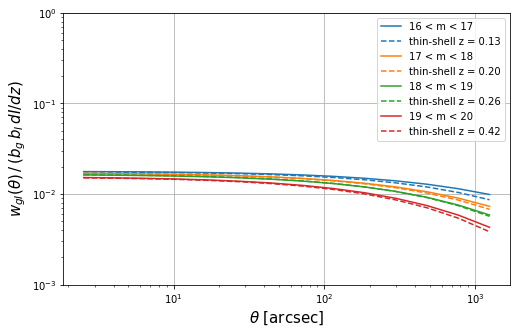

In [14]:
from astropy import units as u
from utils import *
from clustering import *

inst = 1
ifield = 8

fig, ax = plt.subplots(1,1,figsize=(8,5))

theta_binedges_arcsec = np.logspace(0.3,3.2,15) # arcsec
theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])
for im in range(4):
    m_min = magbindict['m_min'][im]
    m_max = magbindict['m_max'][im]
    xoff = 1 + (im-1.5)*0.05
    
    cat_data = get_catalog(inst, ifield, im)
    wgI_arr = wgI(cat_data['z'], theta_bins)
    zm = magbindict['zmean'][im]
    wgI_approx_arr = wgI_zm_approx(zm, theta_bins)
    
    ax.loglog(theta_bins, wgI_arr, c='C'+str(im), label='%d < m < %d'%(m_min,m_max))
    ax.loglog(theta_bins, wgI_approx_arr, c='C'+str(im), ls='--',label='thin-shell z = %.2f'%(zm))

ax.set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
ax.set_ylabel(r'$w_{gI}(\theta)\,/\,(b_g\,b_I\,dI/dz)$', fontsize=15)
ax.set_ylim([1e-3,1e0])
ax.grid()
ax.legend()

# Window Function Test

/Users/ytcheng/ciber/python_ciber/stack_modelfit/make_maps_RMF.py:57: RuntimeWarning: divide by zero encountered in log10
  amplitude = 10**spline_cl_g(np.log10(ls))
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:53: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:55: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:58: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:63: RuntimeWarning: invalid value encountered in greater_equal
/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:65: RuntimeWarning: invalid value encountered in less
/Users/ytcheng/ciber/python_ciber

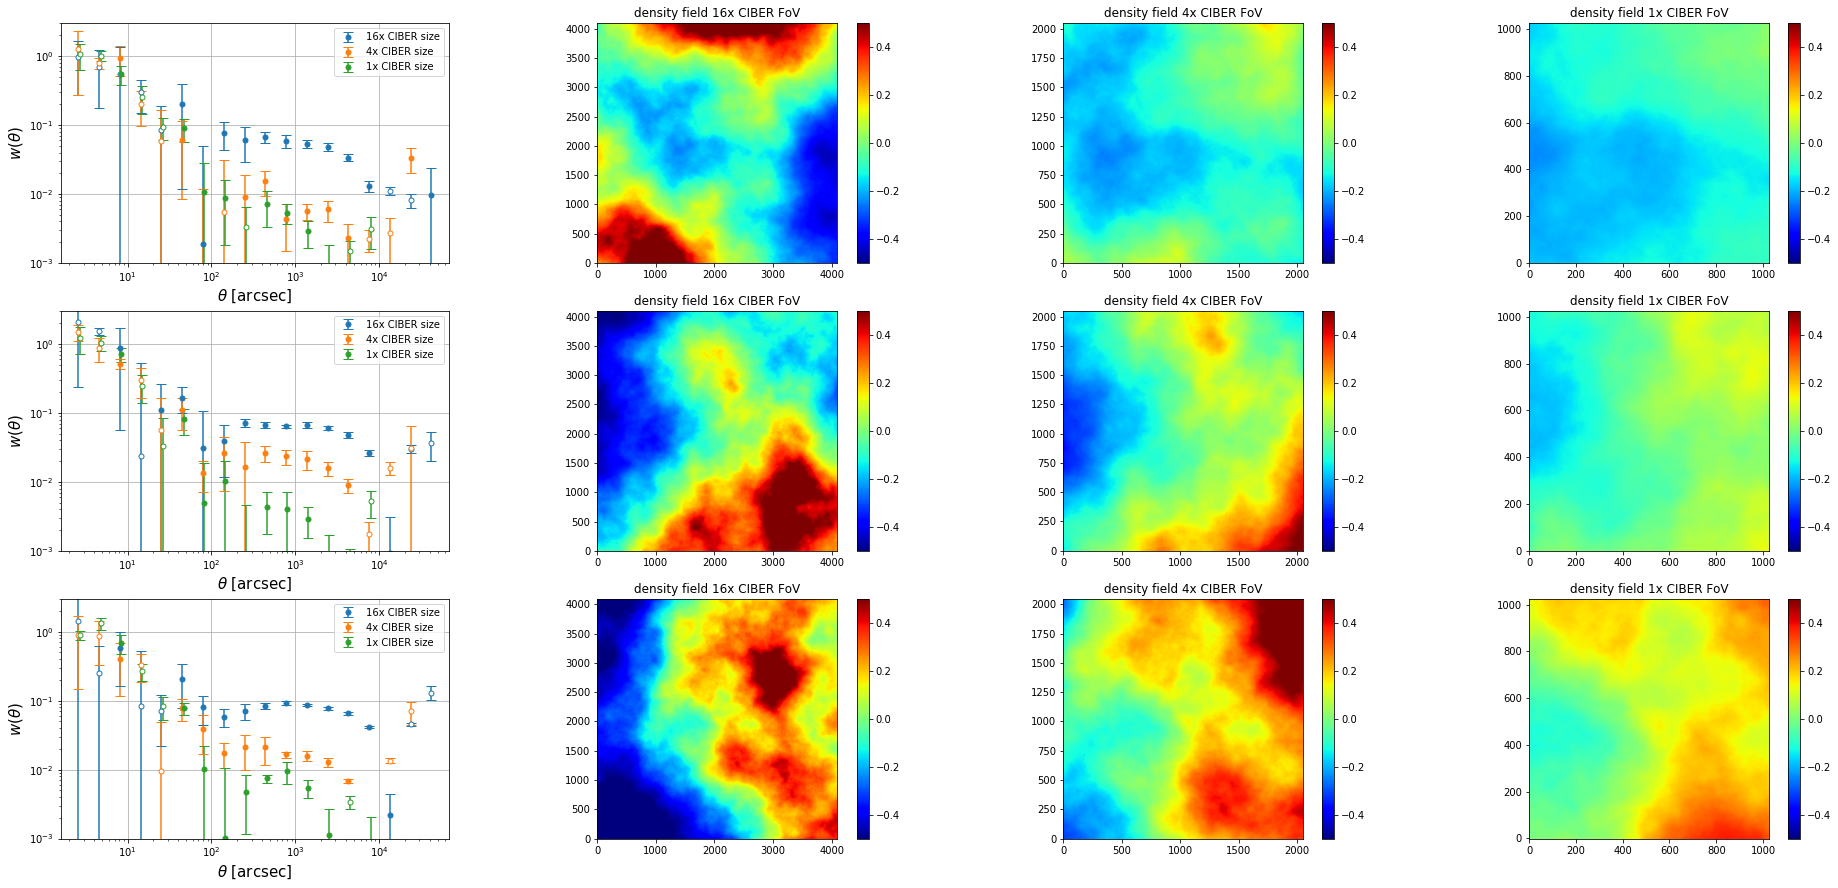

In [21]:
from astropy import units as u
from utils import *
from clustering import *
from make_maps_RMF import *

ells = np.logspace(1,5,100)
logx, logy =np.array([np.log10(1e2),np.log10(1e3)]), np.array([np.log10(100),np.log10(1)])
x, y = 10**logx, 10**logy
logCl = scipy.interpolate.InterpolatedUnivariateSpline(logx, logy, k=1)
cl = 10**logCl(np.log10(ells))
cl = cl/1e7

ell_min = 90
Npix = 1024
deg_pix = 2/Npix
fig, ax = plt.subplots(3,4,figsize=(32,15))
for i in range(3):
    upscale = 4
    counts4, density_fields4 = generate_count_map_2d(1,
                                                   ell_min=ell_min/upscale,
                                                   cl=cl, 
                                                   ell_sampled=ells,
                                                   size=Npix*upscale,
                                                  Ntot=10000)
    ra4, dec4 = positions_from_counts(counts4[0])
    ra4 = (ra4 - (Npix*upscale-1)/2) * deg_pix
    dec4 = (dec4 - (Npix*upscale-1)/2) * deg_pix

    upscale = 2
    density_fields2 = density_fields4[:,density_fields4.shape[1]//4:density_fields4.shape[1]//4*3+1,
                     density_fields4.shape[1]//4:density_fields4.shape[1]//4*3+1]    
    counts2 = counts_from_density_2d(density_fields2, Ntot=10000)
    ra2, dec2 = positions_from_counts(counts2[0])
    ra2 = (ra2 - (Npix*upscale-1)/2) * deg_pix
    dec2 = (dec2 - (Npix*upscale-1)/2) * deg_pix

    upscale = 1
    density_fields1 = density_fields2[:,density_fields2.shape[1]//4:density_fields2.shape[1]//4*3+1,
                     density_fields2.shape[1]//4:density_fields2.shape[1]//4*3+1]    
    counts1 = counts_from_density_2d(density_fields1, Ntot=10000)
    ra1, dec1 = positions_from_counts(counts1[0])
    ra1 = (ra1 - (Npix*upscale-1)/2) * deg_pix
    dec1 = (dec1 - (Npix*upscale-1)/2) * deg_pix


    theta_binedges_arcsec = np.logspace(0.3,5,20) # arcsec
    theta_binedges_deg = (theta_binedges_arcsec * u.arcsec).to(u.deg).value # deg
    theta_bins = np.sqrt(theta_binedges_arcsec[1:] * theta_binedges_arcsec[:-1])
    corr1, dcorr1, _ = get_angular_2pt_func(ra1, dec1, theta_binedges_deg, nboot=5)
    corr2, dcorr2, _ = get_angular_2pt_func(ra2, dec2, theta_binedges_deg, nboot=5)
    corr4, dcorr4, _ = get_angular_2pt_func(ra4, dec4, theta_binedges_deg, nboot=5)

    ax[i][0].errorbar(theta_bins[corr4>=0]*0.98, corr4[corr4>=0], dcorr4[corr4>=0],
                fmt='.', color='C'+str(0),capsize=5, markersize=10, alpha=1, label='16x CIBER size')
    ax[i][0].errorbar(theta_bins[corr4<0]*0.98, -corr4[corr4<0], dcorr4[corr4<0],
                fmt='.', mfc='white', color='C'+str(0),capsize=5, markersize=10, alpha=1)

    ax[i][0].errorbar(theta_bins[corr2>=0]*0.98, corr2[corr2>=0], dcorr2[corr2>=0],
                fmt='.', color='C'+str(1),capsize=5, markersize=10, alpha=1, label='4x CIBER size')
    ax[i][0].errorbar(theta_bins[corr2<0]*0.98, -corr2[corr2<0], dcorr2[corr2<0],
                fmt='.', mfc='white', color='C'+str(1),capsize=5, markersize=10, alpha=1)

    ax[i][0].errorbar(theta_bins[corr1>=0]*1.02, corr1[corr1>=0], dcorr1[corr1>=0],
                fmt='.', color='C'+str(2),capsize=5, markersize=10, alpha=1, label='1x CIBER size')
    ax[i][0].errorbar(theta_bins[corr1<0]*1.02, -corr1[corr1<0], dcorr1[corr1<0],
                fmt='.', mfc='white', color='C'+str(2),capsize=5, markersize=10, alpha=1)


    ax[i][0].set_xscale('log')
    ax[i][0].set_yscale('log')
    ax[i][0].set_xlabel(r'$\theta$ [arcsec]', fontsize=15)
    ax[i][0].set_ylabel(r'$w(\theta)$', fontsize=15)
    ax[i][0].legend()
    ax[i][0].set_ylim([1e-3,3e0])
    ax[i][0].grid()

    imageclip(density_fields4[0], ax=ax[i][1], vmin=-0.5, vmax=0.5)
    ax[i][1].set_title('density field 16x CIBER FoV')
    imageclip(density_fields2[0], ax=ax[i][2], vmin=-0.5, vmax=0.5)
    ax[i][2].set_title('density field 4x CIBER FoV')
    imageclip(density_fields1[0], ax=ax[i][3], vmin=-0.5, vmax=0.5)
    ax[i][3].set_title('density field 1x CIBER FoV')
    
plt.savefig('/Users/ytcheng/Desktop/wgg_window_test.png', dpi = 150, bbox_inches='tight')

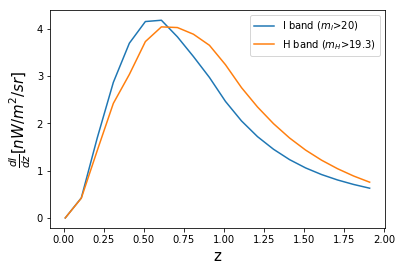

In [18]:
from Helgason import *
from utils import *

nu_sampled = np.array([1.05, 1.79])
z_sampled = np.arange(0.01,2,0.1)
dIdz_sampled = np.zeros((len(nu_sampled),len(z_sampled)))
dM = 0.1
M_arr = np.arange(-25,-17,dM)

for iz,z in enumerate(z_sampled):
    dV = ((3e5 * u.km / u.second) / cosmo.H(z) * cosmo.comoving_distance(z)**2).value # [Mpc^3]
    m_arr = - 2.5 * np.log10(1+z) + M_arr + \
    5 * np.log10((cosmo.luminosity_distance(z) / (10e-6*u.Mpc)).value)
    spI = np.where(m_arr>20)[0]
    spH = np.where(m_arr>19.3)[0]
    lambda_arr = []
    dIdzI_arr = []
    dIdzH_arr = []
    for bandidx in range(12):
        params = bands_class(bandidx)
        lambda_obs = params.wleff * (1+z)
        nu_obs = 3e14 / lambda_obs # [Hz]
        phi_arr = Helgason_LF(z, M_arr, bandidx)
        vFv_arr = nu_obs * 3631*10**(-m_arr/2.5) * 1e-17 #[nW/m^2]
        dIdzI = np.sum(phi_arr[spI] * vFv_arr[spI] * dV) * dM
        dIdzH = np.sum(phi_arr[spH] * vFv_arr[spH] * dV) * dM
        lambda_arr.append(lambda_obs)
        dIdzI_arr.append(dIdzI)
        dIdzH_arr.append(dIdzH)
    fI=scipy.interpolate.InterpolatedUnivariateSpline(lambda_arr, dIdzI_arr, k=1)
    fH=scipy.interpolate.InterpolatedUnivariateSpline(lambda_arr, dIdzH_arr, k=1)
    dIdz_sampled[0,iz] = fI(nu_sampled[0])
    dIdz_sampled[1,iz] = fH(nu_sampled[1])

plt.plot(z_sampled,dIdz_sampled[0], label='I band ($m_I$>20)')
plt.plot(z_sampled,dIdz_sampled[1], label='H band ($m_H$>19.3)')
plt.xlabel('z', fontsize=15)
plt.ylabel(r"$\frac{dI}{dz}[nW/m^2/sr]$",fontsize=15)
plt.legend()
plt.savefig('/Users/ytcheng/Desktop/dIdz.png', dpi = 150, bbox_inches='tight')

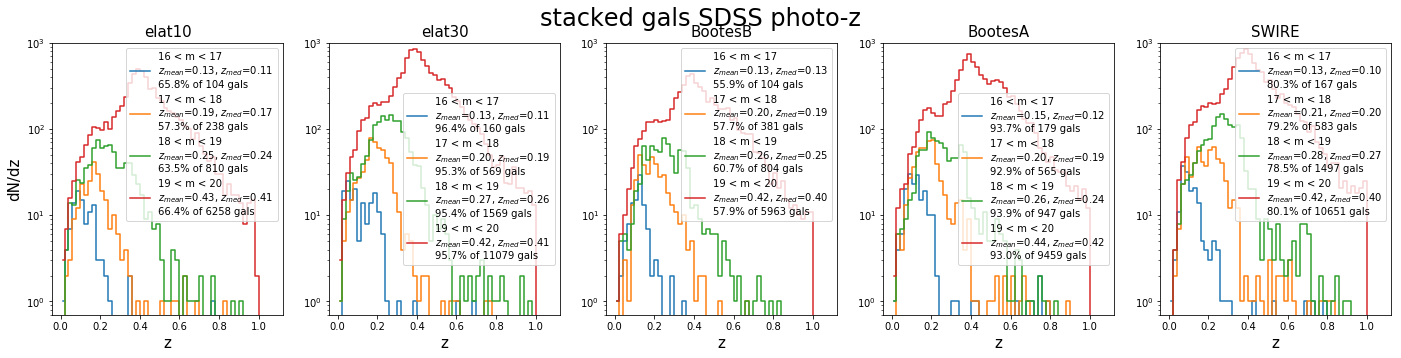

In [19]:
from astropy import units as u
from ciber_info import *

fig, ax = plt.subplots(1, 5, figsize = (24,5))
for i,ifield in enumerate([4,5,6,7,8]):
    field = fieldnamedict[ifield]
    fname = mypaths['PScatdat']+ field + '.csv'
    df = pd.read_csv(fname)

    binedges = np.arange(0,1.1,0.02)
    bins = (binedges[1:] + binedges[:-1]) / 2

    inst=1
    for im in range(4):
        m_min = im + 16
        m_max = im + 17
        dfi = df.loc[(df['sdssClass']==3) \
                    & (df['x'+str(inst)]>-0.5) & (df['x'+str(inst)]<1023.5)\
                    & (df['y'+str(inst)]>-0.5) & (df['y'+str(inst)]<1023.5)\
                    & (df['x'+str(inst)]>-0.5) & (df['x'+str(inst)]<1023.5)\
                    & (df['I_comb']>=m_min) & (df['I_comb']<m_max)]
        Nall = len(dfi)
        dfi = dfi.loc[dfi['Photz']>0]
        f = len(dfi)/Nall

        z = np.array(dfi['Photz'])
        ra = np.array(dfi['ra'])
        dec = np.array(dfi['dec'])

        meanz = np.mean(z)
        medianz = np.median(z)
        h,_ = np.histogram(z, bins=binedges)
        ax[i].step(bins,h, where='mid', 
                 label='%d < m < %d\n'%(m_min,m_max) + \
                   r'$z_{mean}$=%.2f, $z_{med}$=%.2f'%(meanz, medianz) + \
                   '\n%.1f%% of %d gals'%(f*100,len(z)))
    ax[i].set_ylim([7e-1, 1e3])
    ax[i].set_xlabel('z', fontsize=15)
    ax[i].set_title('%s'%field, fontsize=15)
    ax[i]
    ax[i].legend()
    ax[i].set_yscale('log')
ax[0].set_ylabel('dN/dz', fontsize=15)
fig.suptitle('stacked gals SDSS photo-z', fontsize=24)
plt.savefig('/Users/ytcheng/Desktop/z_kernel.png', dpi = 150, bbox_inches='tight')

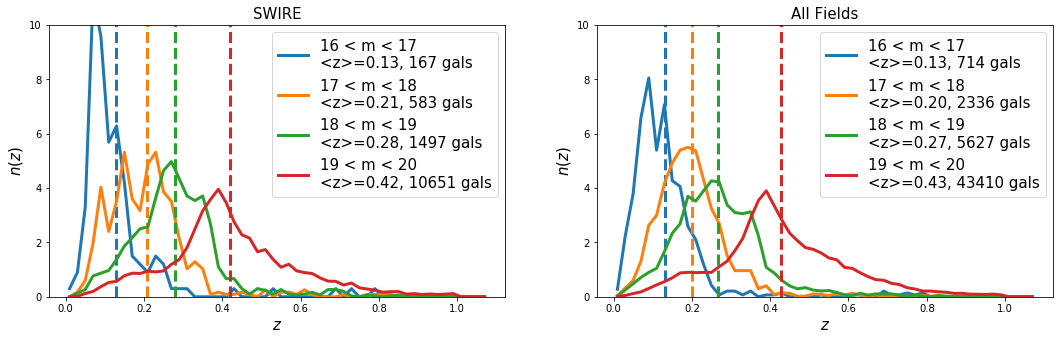

In [81]:
from astropy import units as u
from ciber_info import *

fig, ax = plt.subplots(1, 2, figsize = (18, 5))

dz = 0.02
binedges = np.arange(0,1.1,dz)
bins = (binedges[1:] + binedges[:-1]) / 2

htot = np.zeros([4, len(bins)],dtype=int)

for i,ifield in enumerate([4,5,6,7,8]):
    field = fieldnamedict[ifield]
    fname = mypaths['PScatdat']+ field + '.csv'
    df = pd.read_csv(fname)
    
    inst=1
    for im in range(4):
        m_min = im + 16
        m_max = im + 17
        dfi = df.loc[(df['sdssClass']==3) \
                    & (df['x'+str(inst)]>-0.5) & (df['x'+str(inst)]<1023.5)\
                    & (df['y'+str(inst)]>-0.5) & (df['y'+str(inst)]<1023.5)\
                    & (df['x'+str(inst)]>-0.5) & (df['x'+str(inst)]<1023.5)\
                    & (df['I_comb']>=m_min) & (df['I_comb']<m_max)]
        Nall = len(dfi)
        dfi = dfi.loc[dfi['Photz']>0]
        f = len(dfi)/Nall

        z = np.array(dfi['Photz'])
        ra = np.array(dfi['ra'])
        dec = np.array(dfi['dec'])

        meanz = np.mean(z)
        medianz = np.median(z)
        h,_ = np.histogram(z, bins=binedges)
        htot[im,:] = htot[im,:] + h
        
        if ifield == 8:    
            ax[0].plot(bins, h/np.sum(h)/dz, lw=3, c='C'+str(im),
                      label='%d < m < %d\n'%(m_min,m_max) + \
                       r'<z>=%.2f'%meanz + ', %d gals'%len(z))
            ax[0].axvline(meanz,c='C'+str(im),ls='--', lw=3)
            ax[0].set_xlabel('$z$', fontsize=15)
            ax[0].set_title('%s'%field, fontsize=15)
            ax[0].legend(fontsize=15)
            ax[0].set_ylim([0,10])
            ax[0].set_ylabel('$n(z)$', fontsize=15)


for im in range(4):
    m_min = im + 16
    m_max = im + 17
    meanz=np.sum(htot[im,:]*bins)/np.sum(htot[im,:])
    ax[1].plot(bins, htot[im,:]/np.sum(htot[im,:])/dz, lw=3,  c='C'+str(im),
              label='%d < m < %d\n'%(m_min,m_max) + \
               r'<z>=%.2f'%meanz + ', %d gals'%np.sum(htot[im,:]))
    ax[1].axvline(meanz,c='C'+str(im),ls='--', lw=3)
ax[1].set_xlabel('$z$', fontsize=15)
ax[1].set_ylabel('$n(z)$', fontsize=15)
ax[1].set_title('All Fields', fontsize=15)
ax[1].legend(fontsize=15)
ax[1].set_ylim([0,10])
plt.savefig('plots/z_kernel.png', dpi = 200, bbox_inches='tight')

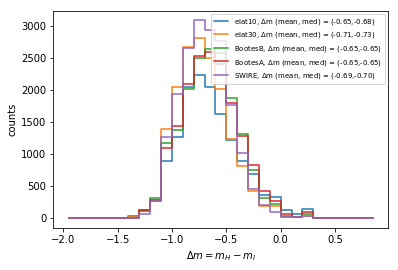

In [20]:
from astropy import units as u
from ciber_info import *

binedges = np.arange(-2,1,0.1)
bins = (binedges[1:] + binedges[:-1]) / 2

for i,ifield in enumerate([4,5,6,7,8]):
    field = fieldnamedict[ifield]
    fname = mypaths['PScatdat']+ field + '.csv'
    df = pd.read_csv(fname)
    dfi = df.loc[(df['sdssClass']==3) \
            & (df['x'+str(inst)]>-0.5) & (df['x'+str(inst)]<1023.5)\
            & (df['y'+str(inst)]>-0.5) & (df['y'+str(inst)]<1023.5)\
            & (df['x'+str(inst)]>-0.5) & (df['x'+str(inst)]<1023.5)\
            & (df['I_comb']>=19.5) & (df['I_comb']<20.5)]

    I_arr = np.array(dfi['I_comb'])
    H_arr = np.array(dfi['H_comb'])
    h,_ = np.histogram(H_arr-I_arr, bins=binedges)
    plt.step(bins,h, where='mid',label='%s, $\Delta$m (mean, med) = (%.2f,%.2f)'%(field,
                                                    np.mean(H_arr-I_arr),np.median(H_arr-I_arr)))
plt.legend(fontsize=7)
plt.xlabel('$\Delta m = m_{H} - m_{I}$')
plt.ylabel('counts')
plt.savefig('/Users/ytcheng/Desktop/Dmask_mag.png', dpi = 150, bbox_inches='tight')

# mask radius - BG level test

In [10]:
from mask import *




In [12]:
savename = './maskrad_test_data/maskrad_test_TM%d_%s'\
%(1, fieldnamedict[8])
d=np.load(savename+'.npy')

In [1]:
# inst=1
# ifield=8

# calfac = cal_factor_dict['apf2nWpm2psr'][inst][ifield]
# cbmap, mask_inst = \
# load_processed_images(return_names=[(inst,ifield,'map'),
#                                    (inst,ifield,'mask_inst')])
# cbmap *= calfac


# Ith_arr = [10,5,1,0.5,0.3,0.1,0.05]
# maskf_arr = np.zeros_like(Ith_arr)
# meanmap_arr = np.zeros_like(Ith_arr)

# for i,Ith in enumerate(Ith_arr):
#     print('=================Ith={}================='.format(Ith))
#     strmask, _ = Ith_mask(inst, ifield, Ith=Ith)
#     sigmask = sigma_clip_mask(cbmap, strmask*mask_inst)
#     meanmap_arr[i] = np.mean(cbmap[sigmask==1])
#     maskf_arr[i] = 1-np.sum(sigmask)/np.size(cbmap)
#     print(meanmap_arr[i],maskf_arr[i])
# clear_output()

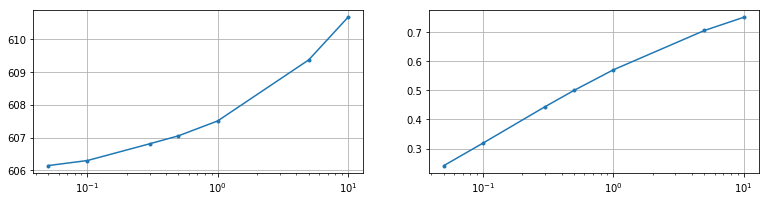

In [41]:
from utils_plotting import *

fig, ax = plt.subplots(1,2,figsize=(13,3))
ax[0].semilogx(Ith_arr, meanmap_arr,'.-')
ax[0].grid()
ax[1].semilogx(Ith_arr, 1-maskf_arr,'.-')
ax[1].grid()